#### MIDTERM PROJECT TITLE - DISEASE CLASSIFICATION WITH MACHINE LEARNING ( A COMPREHENSIVE EVALUATION OF TECHNIQUES )

# Disease Prediction

## Importing libraries

In [1]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107746 sha256=e7666e9a399d519f8cf71596ca25ea12e298a2bca69781b33401b46f71c0c717
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
from sklearn.metrics import r2_score,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score




import pylab
import eli5 #for permutation importance
from eli5.sklearn import PermutationImportance

# import tensorflow and keras
import tensorflow as tf
from tensorflow.keras.models import Sequential   # used for initialize ANN model
from tensorflow.keras import layers   # used for different layer structure
from tensorflow.keras.layers import Dense

import pylab
import eli5 #for permutation importance
from eli5.sklearn import PermutationImportance
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading Train Dataset

In [3]:
train_set = pd.read_csv('/content/Training.csv')
test_set = pd.read_csv('/content/Testing.csv')
train_set = train_set.iloc[:,:-1]
train_set.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


### Shape of training set

In [4]:
nRow,nCol=train_set.shape
print(f'**Summary**:\n There are {nRow} rows and {nCol} columns. Prognosis is the target/label variable.')

**Summary**:
 There are 4920 rows and 133 columns. Prognosis is the target/label variable.


### Output Variable: Prognosis

In [5]:
train_set['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [6]:
print(f'**Summary**:\n There are 41 diseases in the dataset and each containing 120 rows. So, the dataset is equally balanced.')

**Summary**:
 There are 41 diseases in the dataset and each containing 120 rows. So, the dataset is equally balanced.


## Data Pre-processing

### Checking Missing data points

In [7]:
# Get the number of missing data points, NA's ,NAN's values per column
total = train_set.isnull().sum().sort_values(ascending=False)
percent = (train_set.isnull().sum()/train_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

total = train_set.isna().sum().sort_values(ascending=False)
percent = (train_set.isna().sum()/train_set.isna().count()).sort_values(ascending=False)
na_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

if((na_data.all()).all()>0 or (na_data.all()).all()>0):
     print('Found Missing Data or NA values')
        
else:
    print('There is no missing data or null values in the collected data. Additionally, the length of each column is same.')

There is no missing data or null values in the collected data. Additionally, the length of each column is same.


In [8]:
# Calculating the percentage of missing data points for each column
percent_missing = (train_set.isnull().sum() / len(train_set)) * 100
percent_missing = percent_missing.drop('prognosis') # Exclude the target/label column

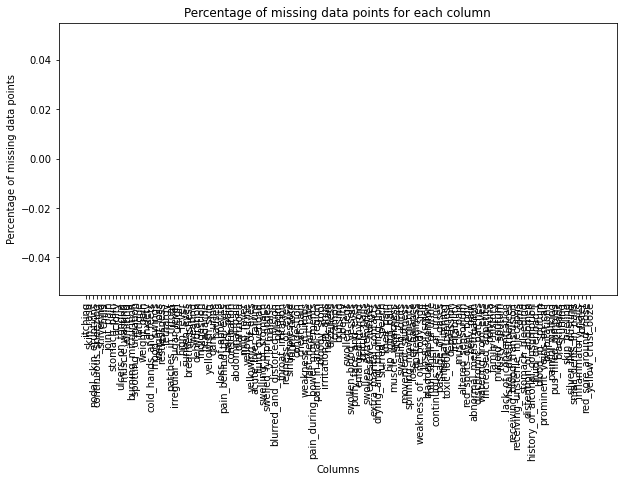

In [9]:
# Creating a bar graph to show the percentage of missing data points for each column
plt.figure(figsize=(10,5))
plt.bar(percent_missing.index, percent_missing.values)
plt.title('Percentage of missing data points for each column')
plt.xlabel('Columns')
plt.ylabel('Percentage of missing data points')
plt.xticks(rotation=90)
plt.show()

### Detecting Outliers

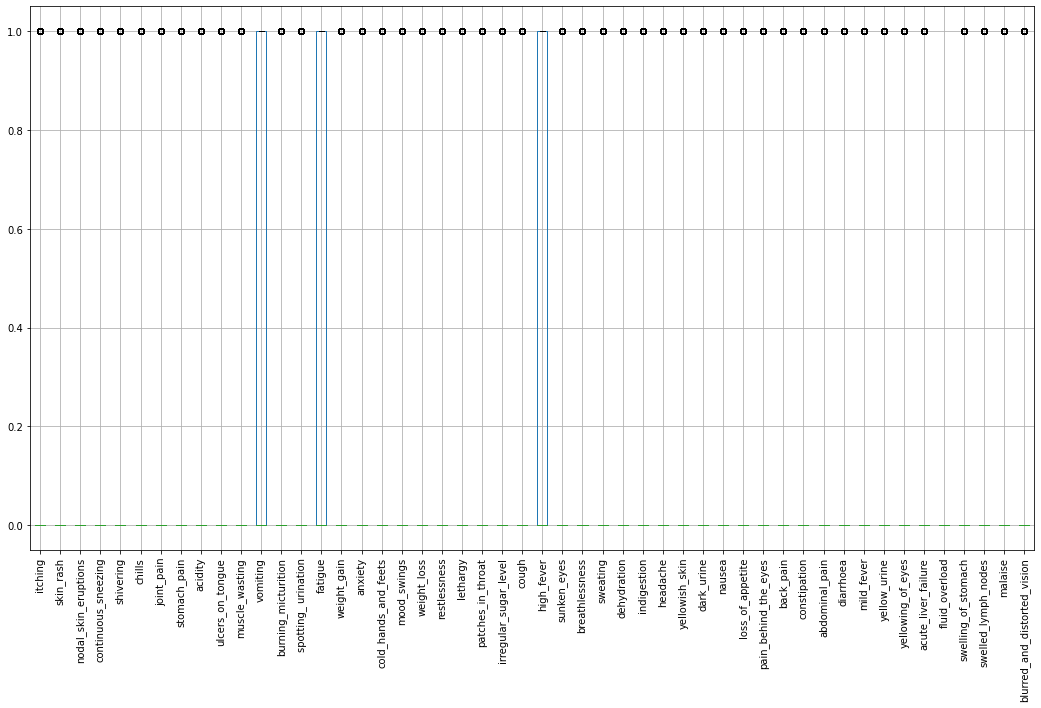

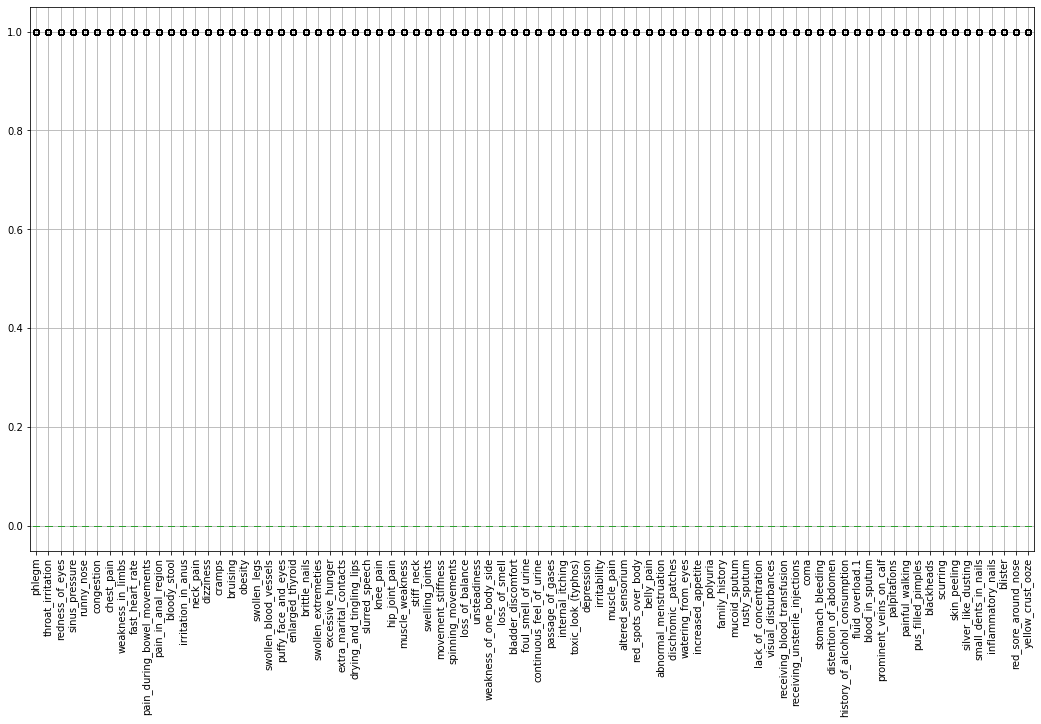

**Summary**:
 No outliers


In [10]:
temp_df=train_set.iloc[:,:-1]
#Detect outliers
plt.subplots(figsize=(18,10))
temp_df.iloc[:,:50].boxplot()
plt.xticks(rotation=90)
plt.show()

plt.subplots(figsize=(18,10))
temp_df.iloc[:,50:].boxplot()
plt.xticks(rotation=90)
plt.show()

print(f'**Summary**:\n No outliers')

### Correlation Matrix

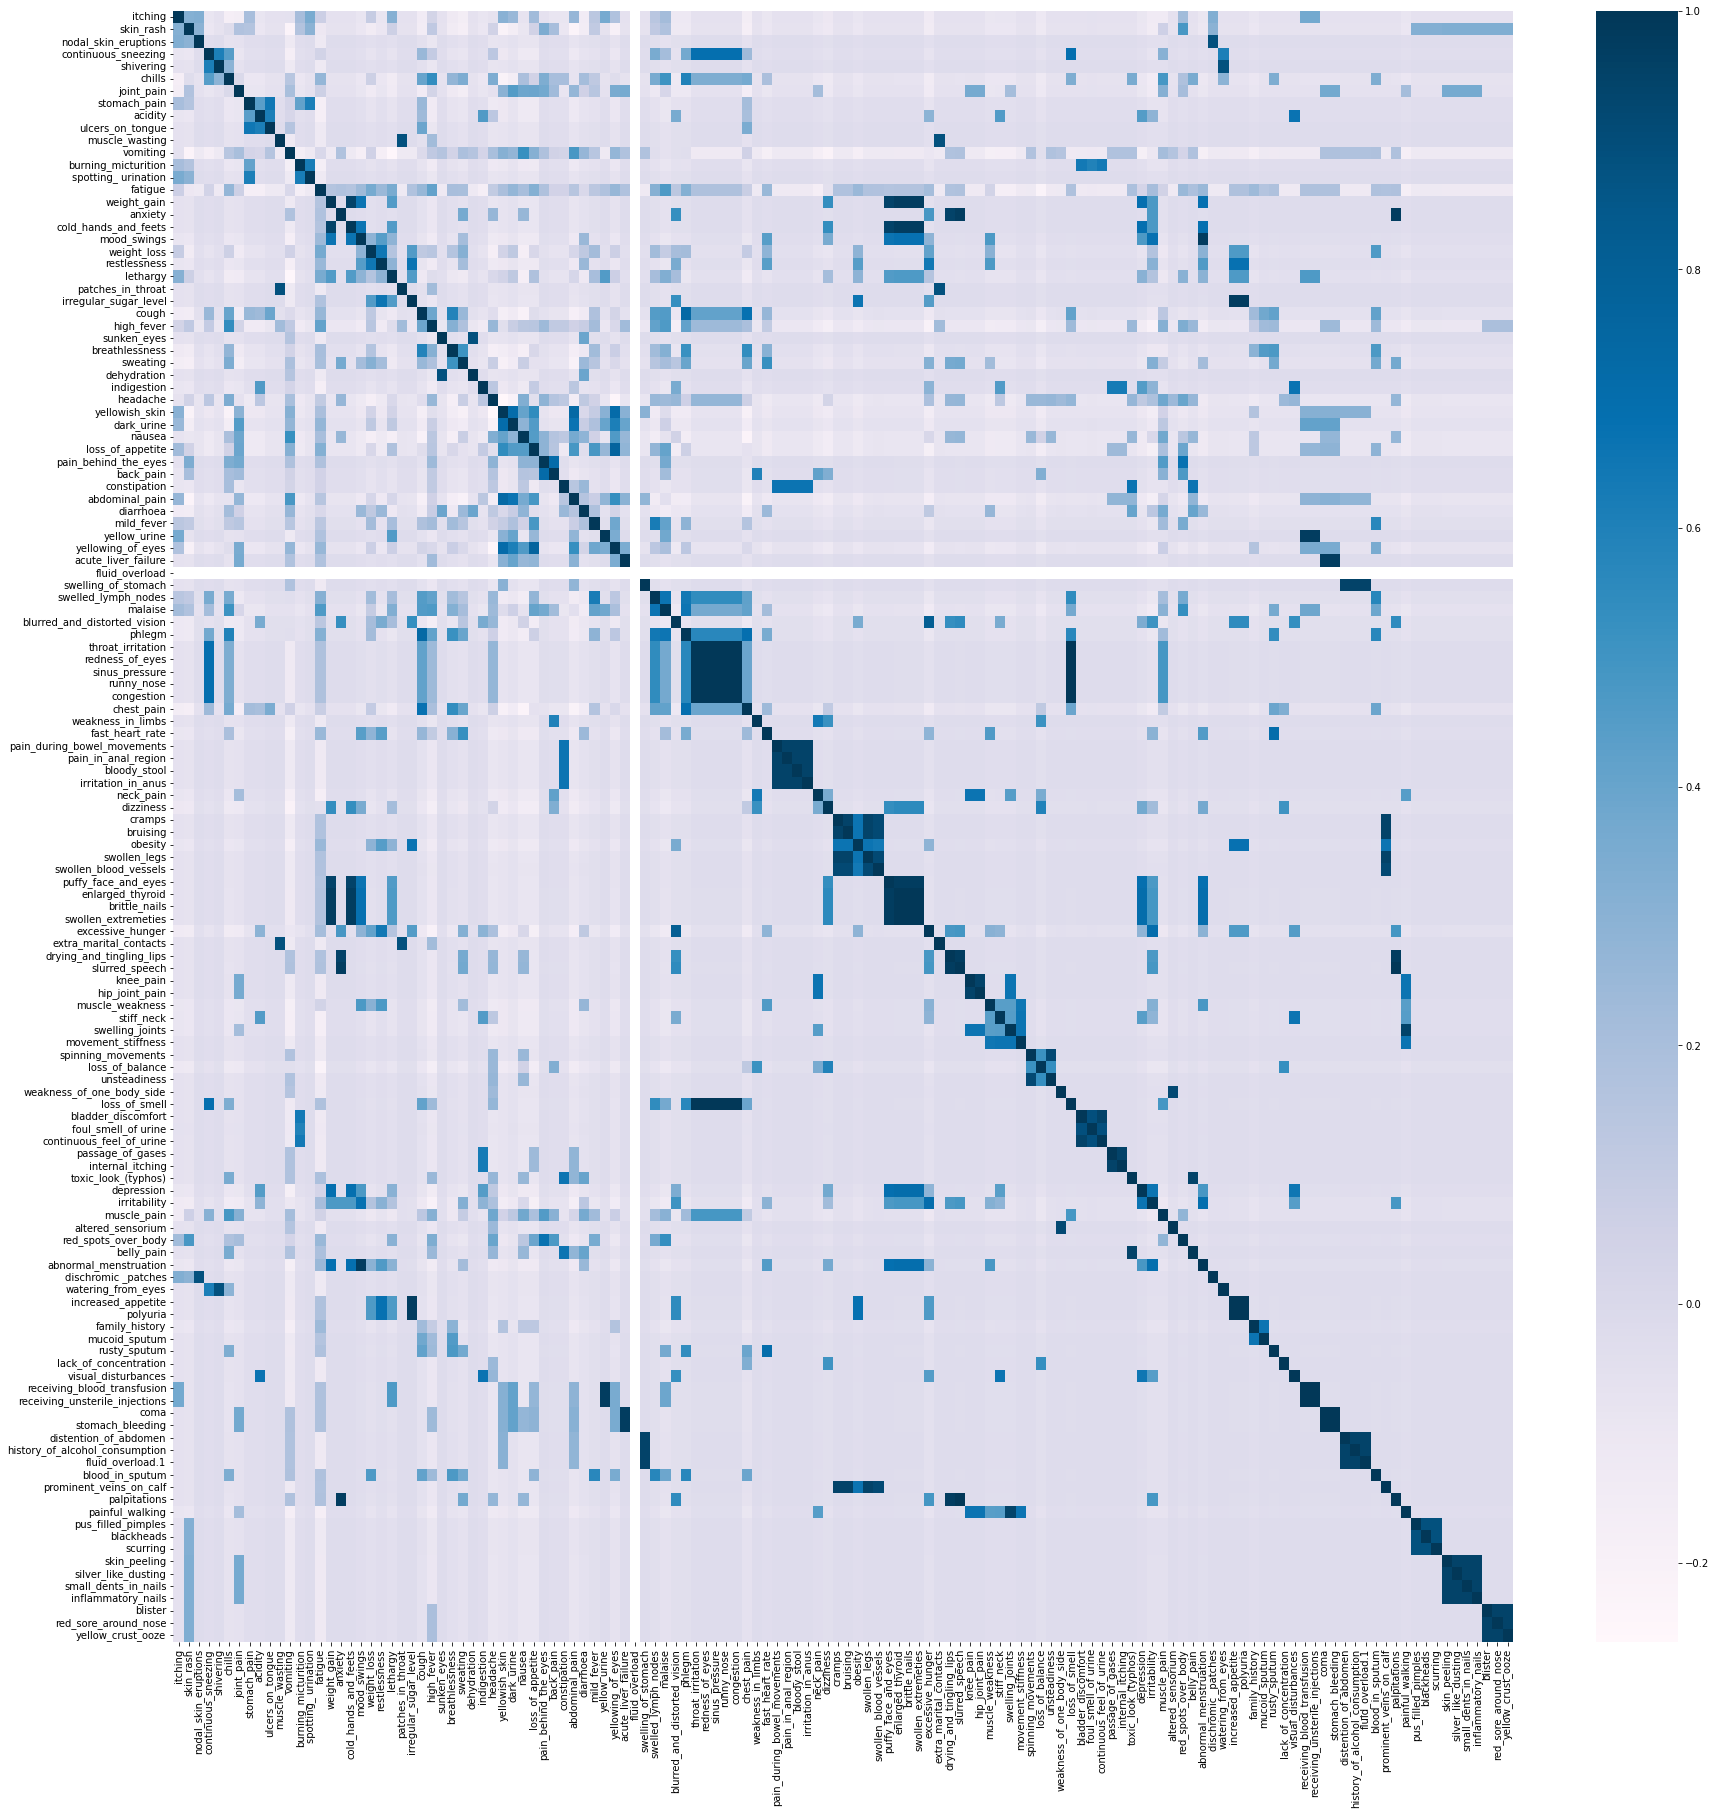

In [11]:
plt.figure(figsize = (30, 30))
sns.heatmap(train_set.corr(), cmap = 'PuBu', annot = False)
plt.show()

#### Dropping feature columns with correlation greater than 0.9

In [12]:
corr_matrix=train_set.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,NaN,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,NaN,NaN,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,NaN,NaN,NaN,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,NaN,NaN,NaN,NaN,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,NaN,NaN,NaN,NaN,NaN,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.023720,-0.023720,-0.023720
blister,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946120,0.946120
red_sore_around_nose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946120


In [13]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop,len(to_drop))

train_set=train_set.drop(to_drop, axis=1)
test_set=test_set.drop(to_drop, axis=1)

['cold_hands_and_feets', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'drying_and_tingling_lips', 'slurred_speech', 'hip_joint_pain', 'unsteadiness', 'loss_of_smell', 'continuous_feel_of_urine', 'internal_itching', 'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'red_sore_around_nose', 'yellow_crust_ooze'] 42


#### Dropping constant feature columns

In [14]:
# using sklearn variance threshold to find constant features
temp_train=train_set.iloc[:,:-1]

from sklearn.feature_selection import VarianceThreshold


sel = VarianceThreshold(threshold=0.03)
sel.fit(temp_train)


VarianceThreshold(threshold=0.03)

In [15]:
# print the constant features
print(
    len([
        x for x in temp_train.columns
        if x not in temp_train.columns[sel.get_support()]
    ]))

to_drop=[x for x in temp_train.columns if x not in temp_train.columns[sel.get_support()]]
train_set=train_set.drop(to_drop, axis=1)
test_set=test_set.drop(to_drop, axis=1)

41


In [16]:
# to_drop

### Label Encoder

In [17]:
encoder = LabelEncoder()
train_set["prognosis"] = encoder.fit_transform(train_set["prognosis"])
test_set["prognosis"] = encoder.transform(test_set["prognosis"])


### Test Valid Split

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(train_set.drop('prognosis', 1), train_set['prognosis'], test_size = .4, random_state=42,shuffle=True)

In [19]:
X_train.shape

(2952, 49)

In [20]:
test_set = pd.concat([test_set,pd.concat([X_valid,y_valid],axis=1)],axis=0)
test_set.shape

(2010, 50)

*italicized text*## Logistic Regression

In [21]:
lr=LogisticRegression()

Hyper-Parameter Tuning for Logistic Regression using Grid Search Cross Validation

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(lr, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_valid, y_valid)))

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best cross-validation score: 0.98
Test set score: 0.99


In [23]:
lr=LogisticRegression(C = 0.1, penalty = 'l2')
lr.fit(X_train,y_train)
print("Logistic Train score with ",format(lr.score(X_train, y_train)))

Logistic Train score with  0.9854336043360433


In [24]:
print("Logistic Test score with ",format(lr.score(test_set.iloc[:,:-1], test_set['prognosis'])))

Logistic Test score with  0.9855721393034826


#### Confusion Matrix

Text(0.5, 637.6, 'Predicted label')

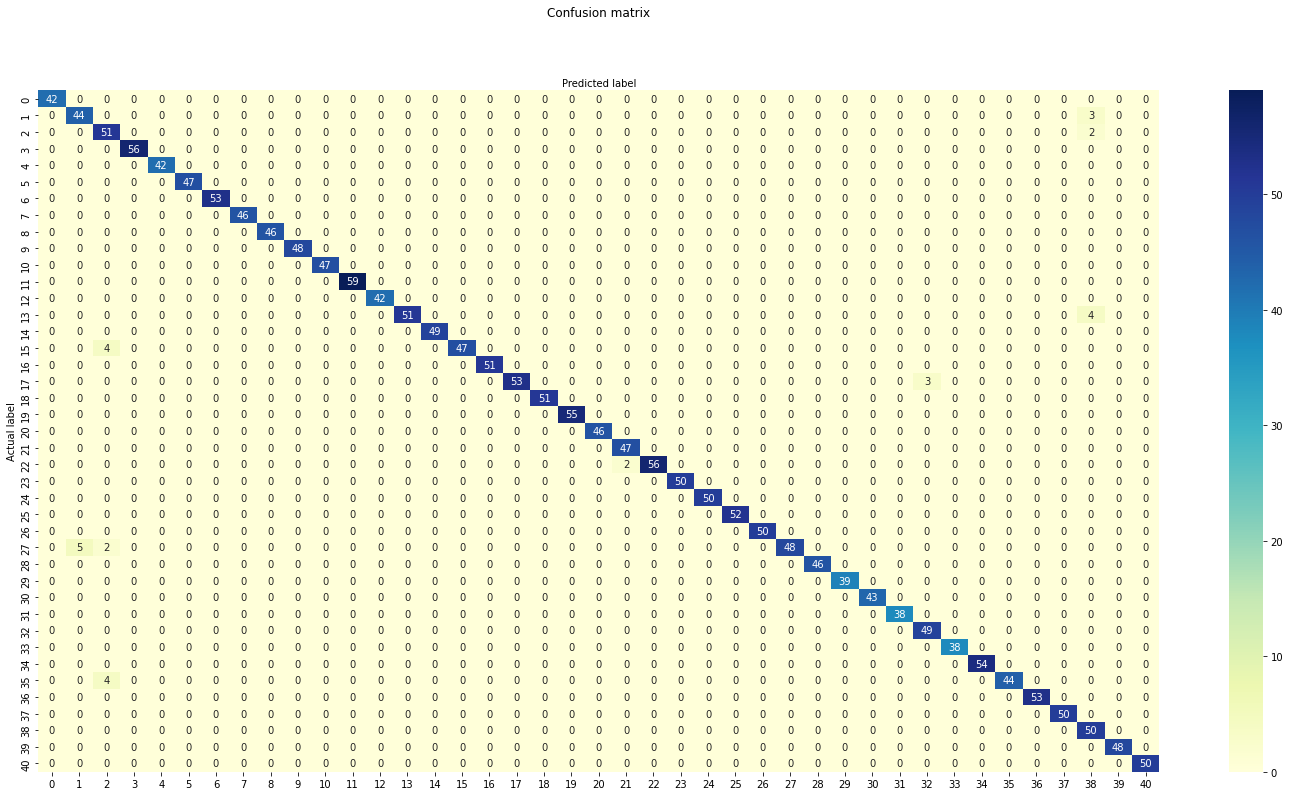

In [25]:
y_pred = lr.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

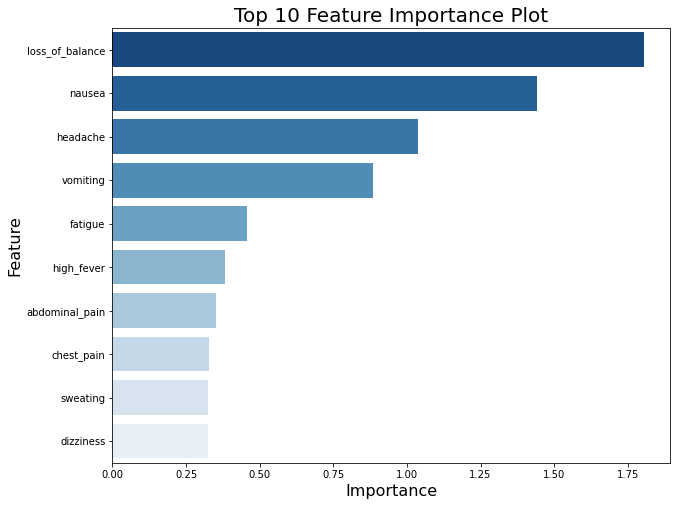

In [26]:
importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(lr.coef_[0])})
importance = importance.sort_values('Importance', ascending=False).reset_index(drop=True)

# Slicing to include only top 10 features
top_features = importance[:10]

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='Blues_r')
plt.title('Top 10 Feature Importance Plot', fontsize=20)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.show()

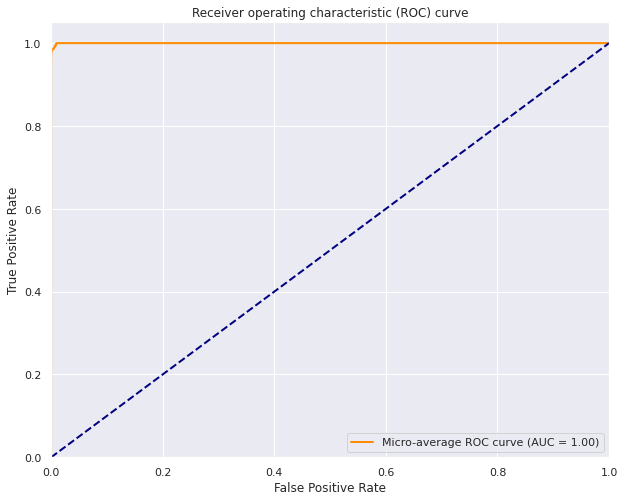

In [71]:
from sklearn.preprocessing import label_binarize

# Compute the predicted probabilities on the test data
y_score = lr.predict_proba(X_valid)

# Binarize the true labels
y_test_bin = label_binarize(y_valid, classes=np.unique(y_train))

# Compute the micro-averaged ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Micro-average ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Classification report

In [27]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.90      0.94      0.92        47
           2       0.84      0.96      0.89        53
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      0.93      0.96        55
          14       1.00      1.00      1.00        49
          15       1.00      0.92      0.96        51
          16       1.00      1.00      1.00        51
          17       1.00    

In a medical test the big indicators of success are specificity and sensitivity.

> Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.

> Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative

> Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.

> F1 score - a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

### Decision Tree

Create a decision tree classifier object


In [28]:
dt = DecisionTreeClassifier()

Hyper-Parameter Tuning for Decision Tree using Grid Search Cross Validation

In [29]:
# Define the parameter grid
param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [1, 2, 3, 4, 5,6,7,8,9,10], 
              'min_samples_split': [2, 3, 4, 5, 6,7,8,9,10],
              'min_samples_leaf': [1, 2, 3, 4, 5,6,7,8,9,10]}
              
# Create a GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_valid, y_valid)))

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best cross-validation score: 0.94
Test set score: 0.95


In [30]:
dt = DecisionTreeClassifier(criterion =  'entropy', max_depth =  10, min_samples_leaf =  1, min_samples_split =  2)
dt.fit(X_train, y_train)
print("Decision Tree Train score with ",format(dt.score(X_train, y_train)))

Decision Tree Train score with  0.9512195121951219


In [31]:
print("Decision Tree Test score with ",format(dt.score(test_set.iloc[:,:-1], test_set['prognosis'])))

Decision Tree Test score with  0.9432835820895522


#### Confusion Matrix

Text(0.5, 637.6, 'Predicted label')

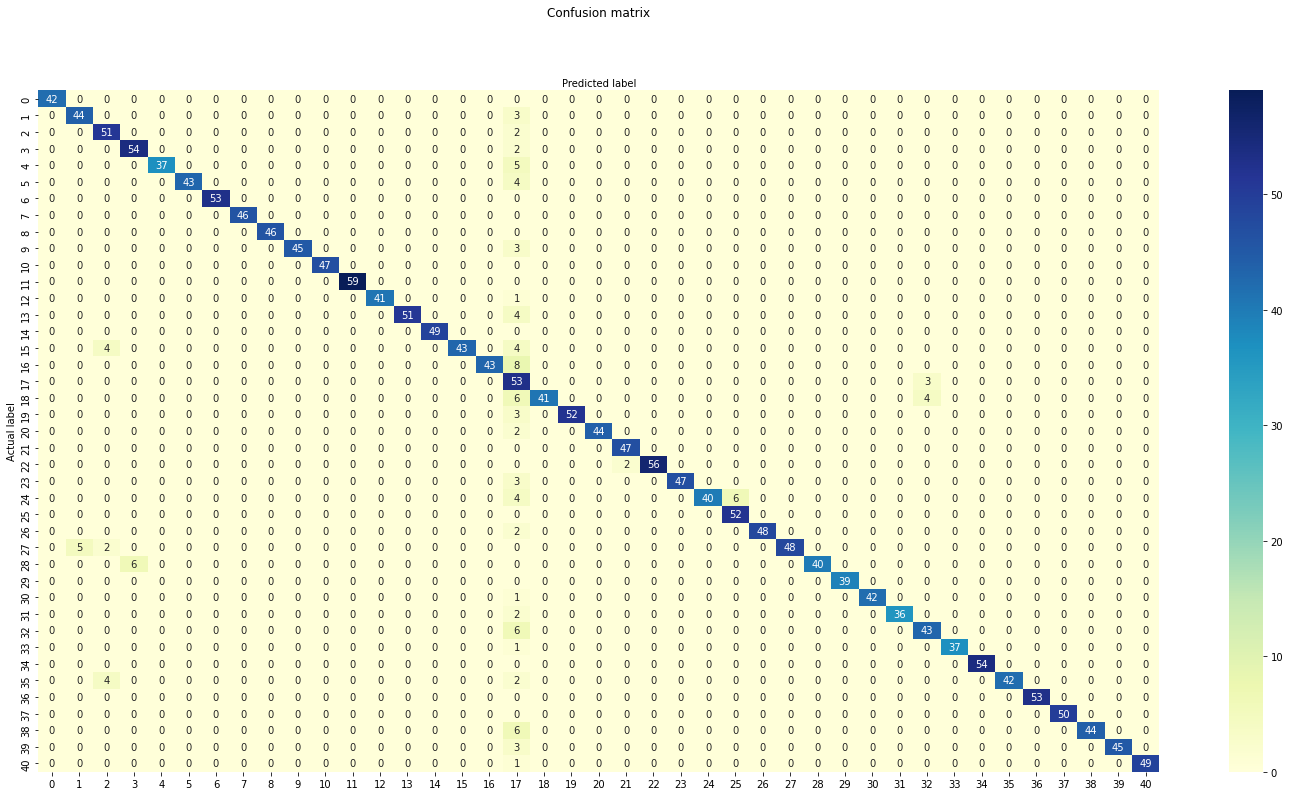

In [32]:
y_pred = dt.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

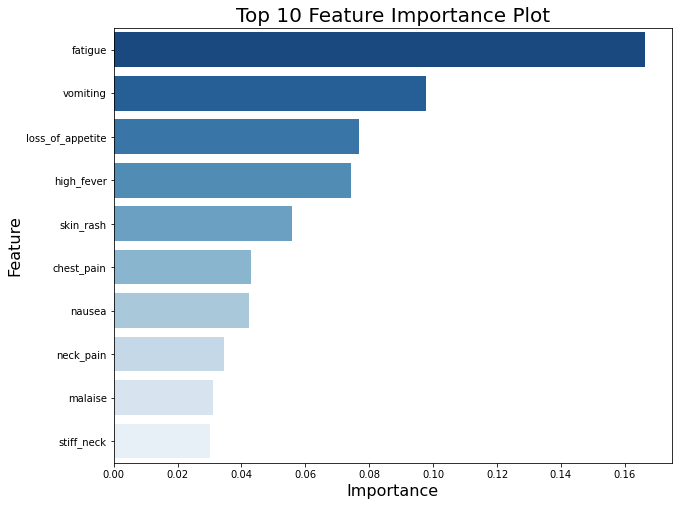

In [33]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

# Slicing to include only top 10 features
top_features = feature_importance[:10]

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='Blues_r')
plt.title('Top 10 Feature Importance Plot', fontsize=20)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.show()

Visualizing the ROC Curve

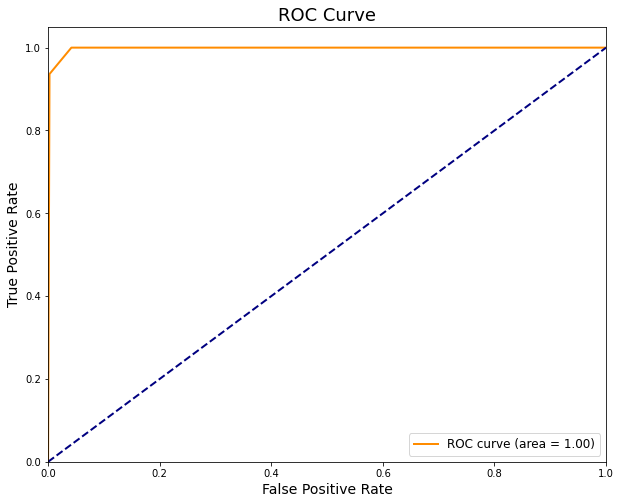

In [34]:
y_prob = dt.predict_proba(test_set.iloc[:,:-1])[:,1]
fpr, tpr, thresholds = roc_curve(test_set['prognosis'], y_prob, pos_label=dt.classes_[1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=18)
plt.legend(loc="lower right", fontsize=12)
plt.show()

Visualizing the Precision-Recall Curve

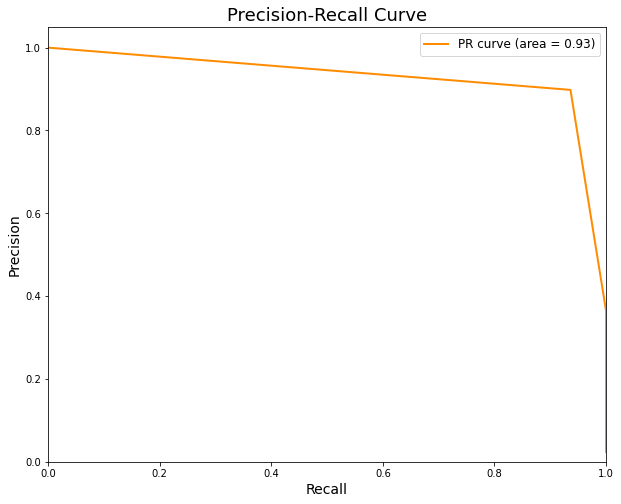

In [35]:
precision, recall, thresholds = precision_recall_curve(test_set['prognosis'], y_prob, pos_label=dt.classes_[1])
pr_auc = auc(recall, precision)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=18)
plt.legend(loc="upper right", fontsize=12)
plt.show()

#### Classification report

In [36]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.90      0.94      0.92        47
           2       0.84      0.96      0.89        53
           3       0.90      0.96      0.93        56
           4       1.00      0.88      0.94        42
           5       1.00      0.91      0.96        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      0.94      0.97        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      0.98      0.99        42
          13       1.00      0.93      0.96        55
          14       1.00      1.00      1.00        49
          15       1.00      0.84      0.91        51
          16       1.00      0.84      0.91        51
          17       0.40    

In a medical test the big indicators of success are specificity and sensitivity.

> Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.

> Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative

> Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.

> F1 score - a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

### Random Forest

Create a Random Forest Classifier object


In [37]:
rf = RandomForestClassifier()

Hyper-Parameter Tuning for Random Forest using Grid Search Cross Validation

In [38]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 
              'criterion': ['gini', 'entropy'], 
              'max_depth': [1, 2, 3, 4, 5], 
              'min_samples_split': [2, 3, 4, 5, 6]}


# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=50, cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: {}".format(random_search.best_params_))
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))
print("Test set score: {:.2f}".format(random_search.score(X_valid, y_valid)))

Best parameters: {'n_estimators': 400, 'min_samples_split': 5, 'max_depth': 5, 'criterion': 'gini'}
Best cross-validation score: 0.97
Test set score: 0.93


In [39]:
rf = RandomForestClassifier(n_estimators =  300, min_samples_split = 6, max_depth =  5, criterion = 'entropy')
rf.fit(X_train, y_train)
y_pred=rf.predict(X_valid)
print("Random Forest Train score with ",format(rf.score(X_train, y_train)))

Random Forest Train score with  0.9769647696476965


Feature importance calculated in terms of weights

In [40]:
perm_imp1 = PermutationImportance(rf, random_state=42,scoring='accuracy').fit(test_set.iloc[:,:-1], test_set['prognosis'])
eli5.show_weights(perm_imp1, feature_names = test_set.iloc[:,:-1].columns.tolist(),top=50)

Weight,Feature
0.1220 ± 0.0131,high_fever
0.1083 ± 0.0073,fatigue
0.0568 ± 0.0030,skin_rash
0.0480 ± 0.0066,vomiting
0.0451 ± 0.0103,joint_pain
0.0436 ± 0.0013,headache
0.0379 ± 0.0076,loss_of_appetite
0.0320 ± 0.0035,yellowish_skin
0.0290 ± 0.0057,itching
0.0286 ± 0.0032,nausea


Visualizing Top 10 features for Random Forest

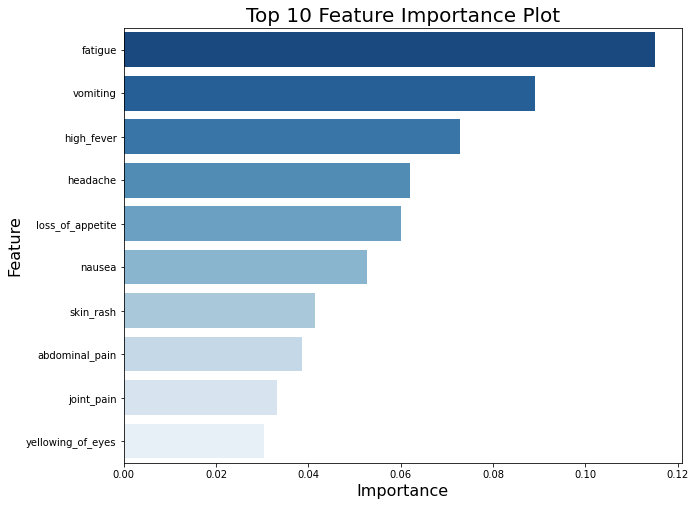

In [41]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

# Slice to include only top 10 features
top_features = feature_importance[:10]

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='Blues_r')
plt.title('Top 10 Feature Importance Plot', fontsize=20)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.show()

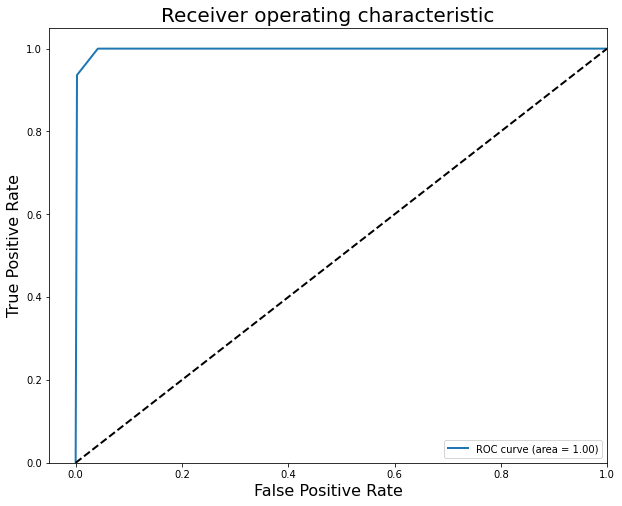

In [42]:
from sklearn.metrics import roc_auc_score

y_prob = rf.predict_proba(X_valid)
roc_auc = roc_auc_score(y_valid, y_prob, multi_class='ovr', average='micro')

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [43]:
print("Random Forest Test score with ",format(rf.score(test_set.iloc[:,:-1], test_set['prognosis'])))

Random Forest Test score with  0.9771144278606965


#### Confusion Matrix

Text(0.5, 637.6, 'Predicted label')

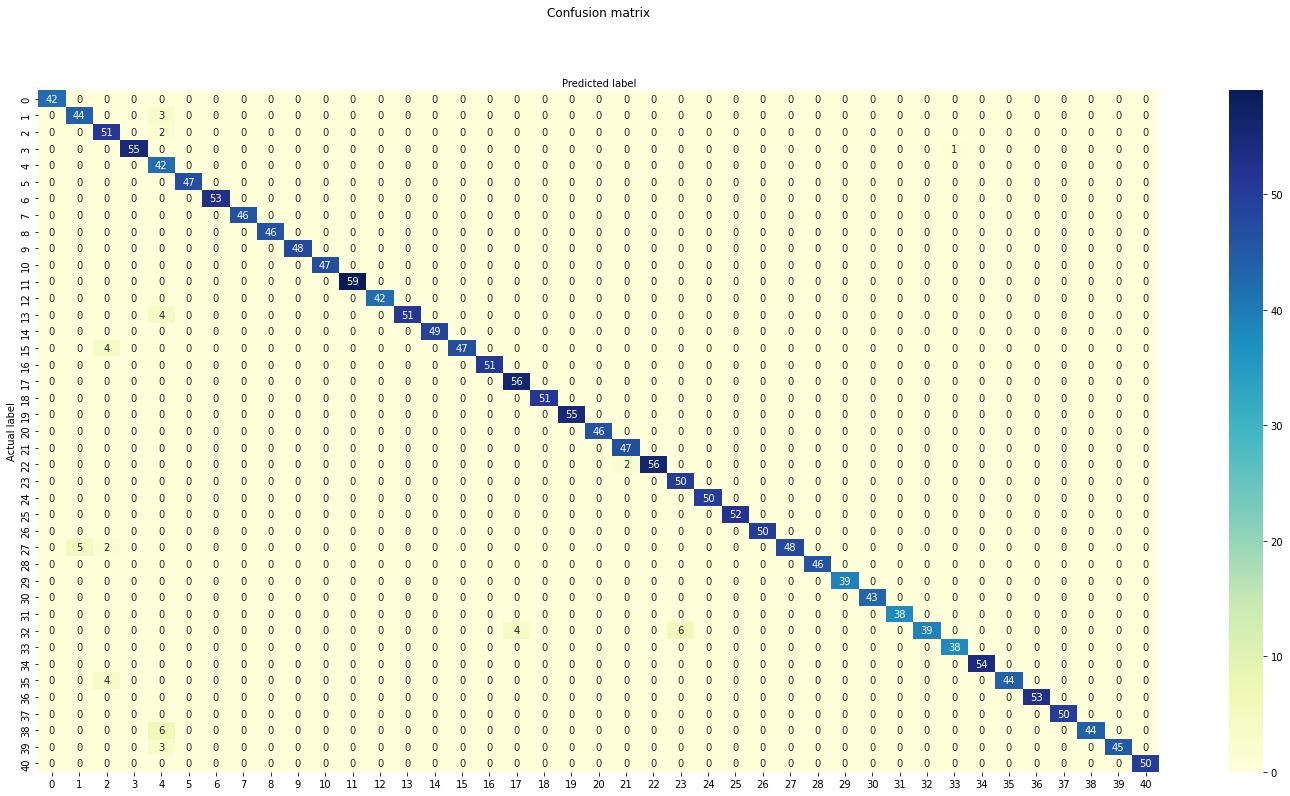

In [44]:
y_pred = rf.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Classification report

In [45]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.90      0.94      0.92        47
           2       0.84      0.96      0.89        53
           3       1.00      0.98      0.99        56
           4       0.70      1.00      0.82        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      0.93      0.96        55
          14       1.00      1.00      1.00        49
          15       1.00      0.92      0.96        51
          16       1.00      1.00      1.00        51
          17       0.93    

In a medical test the big indicators of success are specificity and sensitivity.

> Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.

> Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative

> Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.

> F1 score - a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

### SVM

In [46]:
svm = SVC()

Hyper-Parameter Tuning for SVM using Grid Search Cross Validation

In [47]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
              'gamma': ['scale', 'auto', 0.1, 1, 10]}

# Create an SVM object
svm_classifier = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_valid, y_valid)))

Best parameters: {'C': 0.1, 'gamma': 10, 'kernel': 'poly'}
Best cross-validation score: 0.99
Test set score: 0.99


In [48]:
svm = SVC(C =  0.1, gamma =  10, kernel = 'poly')
svm.fit(X_train, y_train)
y_pred=svm.predict(X_valid)
print("SVM Train score with ",format(svm.score(X_train, y_train)))

SVM Train score with  0.9854336043360433


In [49]:
print("SVM Test score with ",format(svm.score(test_set.iloc[:,:-1], test_set['prognosis'])))

SVM Test score with  0.9855721393034826


#### Confusion Matrix

Text(0.5, 637.6, 'Predicted label')

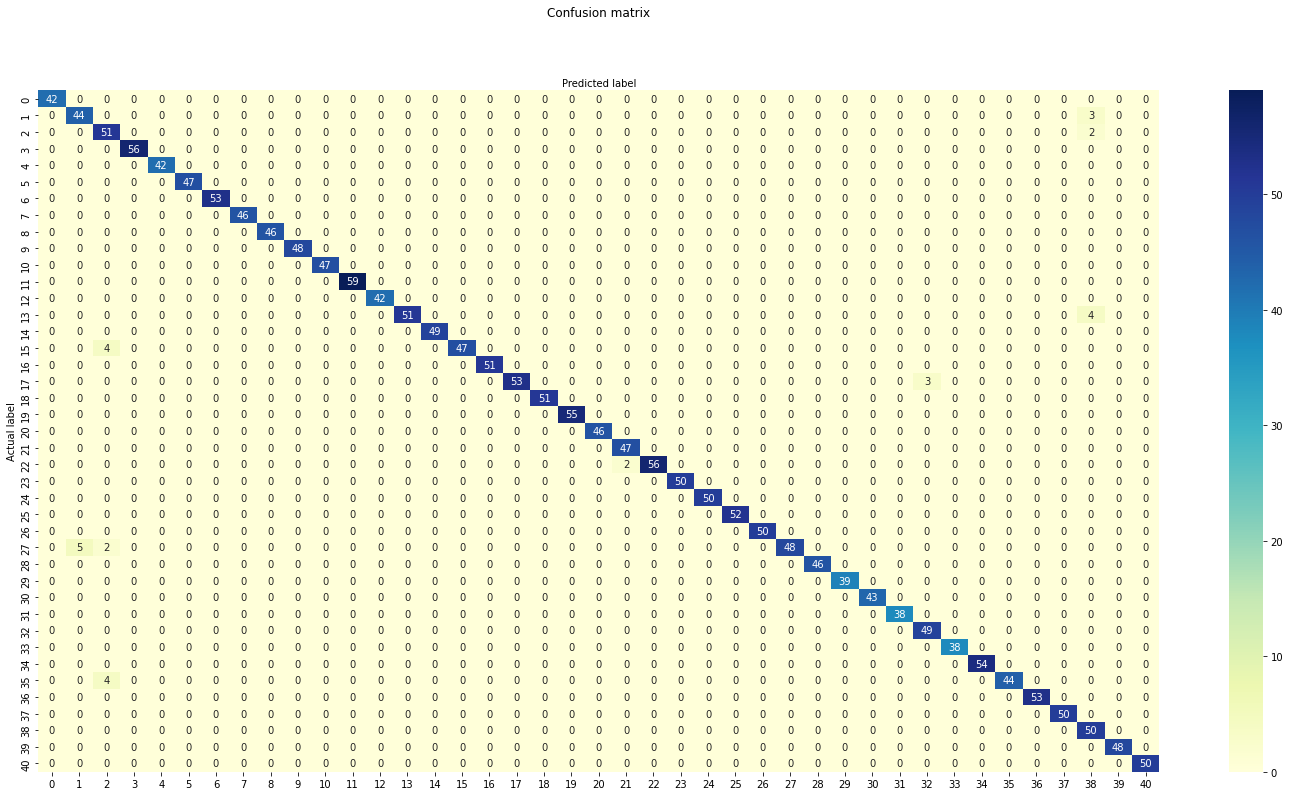

In [50]:
y_pred = svm.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Visualizing Top 10 features for SVM

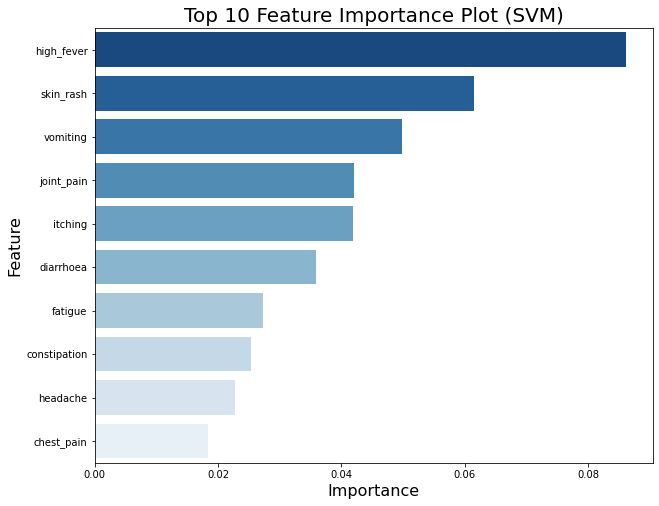

In [51]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svm, X_valid, y_valid, n_repeats=10, random_state=42)
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': result.importances_mean})
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

# Slicing to include only top 10 features
top_features = feature_importance[:10]

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='Blues_r')
plt.title('Top 10 Feature Importance Plot (SVM)', fontsize=20)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.show()

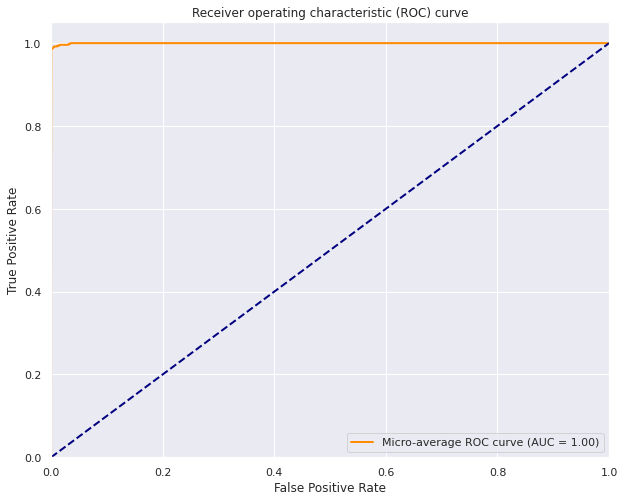

In [79]:
clf = SVC(probability=True, kernel='linear')
clf.fit(X_train, y_train)

# Compute the predicted probabilities on the test data
y_score = clf.predict_proba(X_valid)

# Binarize the true labels
y_test_bin = label_binarize(y_valid, classes=np.unique(y_train))

# Compute the micro-averaged ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Micro-average ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Classification report

In [52]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.90      0.94      0.92        47
           2       0.84      0.96      0.89        53
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      0.93      0.96        55
          14       1.00      1.00      1.00        49
          15       1.00      0.92      0.96        51
          16       1.00      1.00      1.00        51
          17       1.00    

In a medical test the big indicators of success are specificity and sensitivity.

> Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.

> Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative

> Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.

> F1 score - a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

### Naive Bayes

Create a Gaussian Naive Bayes object


In [53]:
bayes = GaussianNB()


Hyper-Parameter Tuning for Naive Bayes using Grid Search Cross Validation

In [54]:
# Define the parameter grid
param_grid = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05],
              'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]}

# Create a GridSearchCV object
grid_search = GridSearchCV(bayes, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_valid, y_valid)))

Best parameters: {'priors': None, 'var_smoothing': 1e-05}
Best cross-validation score: 0.97
Test set score: 0.97


In [55]:
bayes = GaussianNB(priors = None, var_smoothing = 1e-05)
bayes.fit(X_train, y_train)
y_pred=bayes.predict(X_valid)
print("Naive Bayes Train score with ",format(bayes.score(X_train, y_train)))

Naive Bayes Train score with  0.967140921409214


In [56]:
print("Naive Bayes Test score with ",format(bayes.score(test_set.iloc[:,:-1], test_set['prognosis'])),'%')

Naive Bayes Test score with  0.9671641791044776 %


#### Confusion Matrix

Text(0.5, 637.6, 'Predicted label')

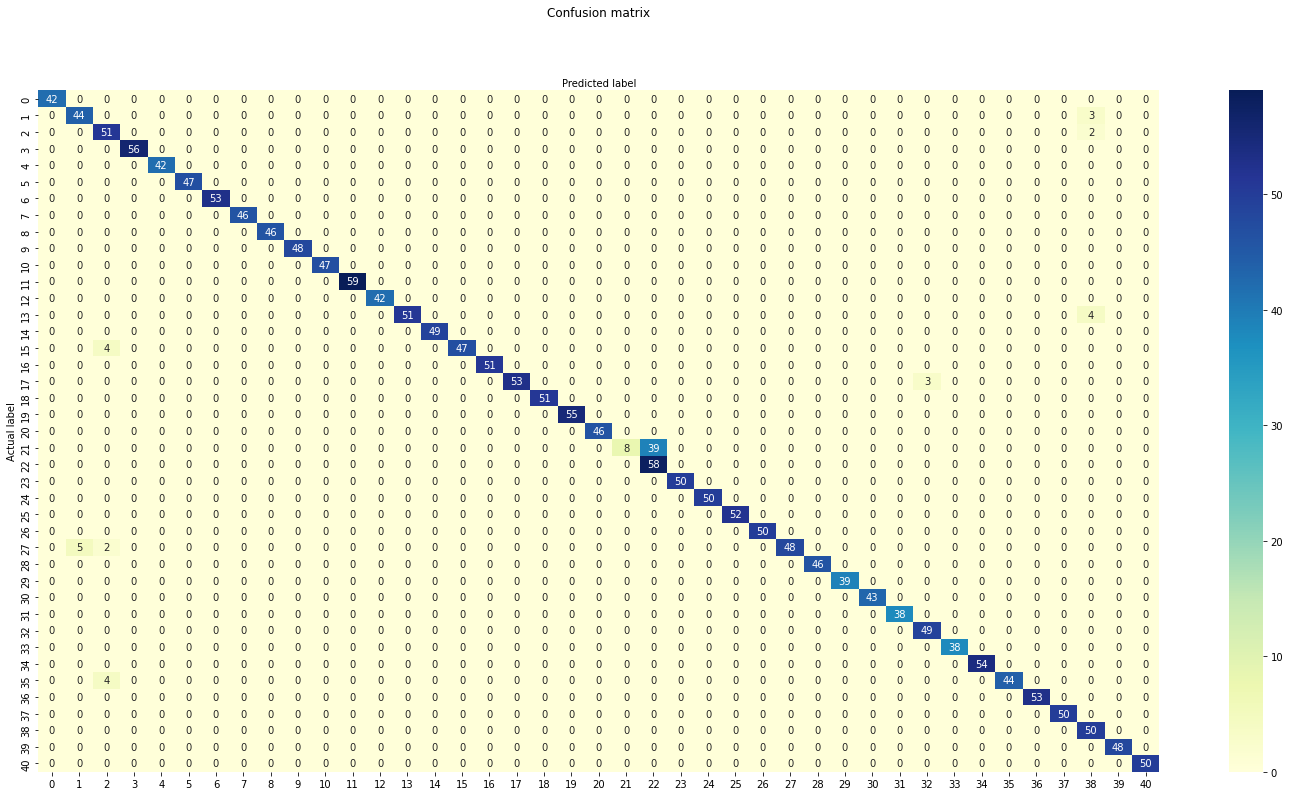

In [57]:
y_pred = bayes.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Visualizing Top 10 features for Naive Bayes

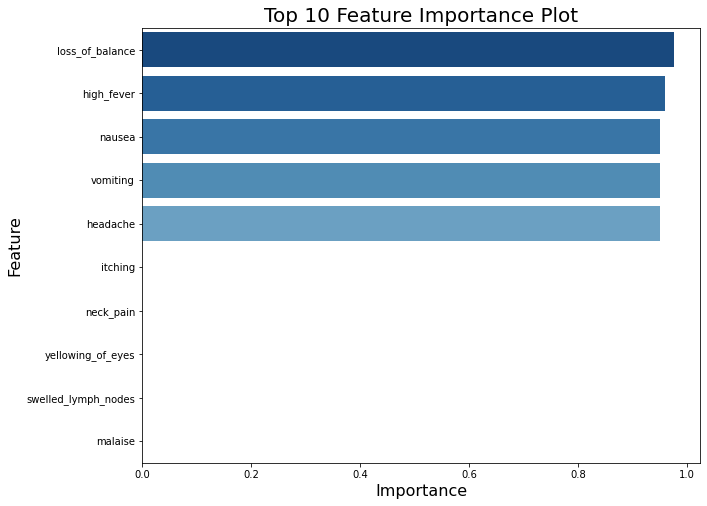

In [58]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(bayes.theta_[1] - bayes.theta_[0])})
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

# Slicing to include only top 10 features
top_features = feature_importance[:10]

# Creating bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='Blues_r')
plt.title('Top 10 Feature Importance Plot', fontsize=20)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.show()

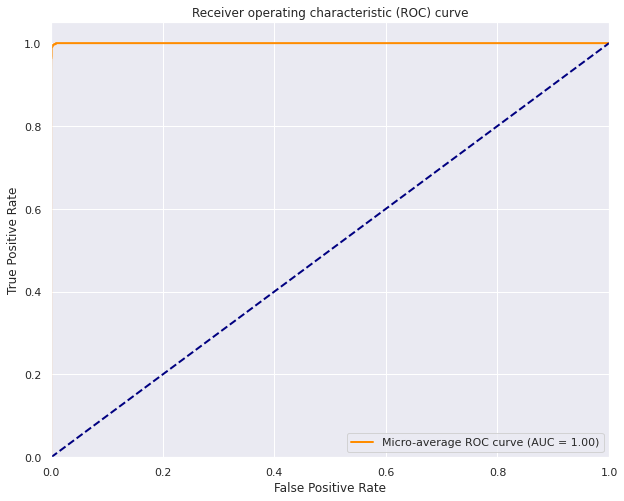

In [74]:
# Compute the predicted probabilities on the test data
y_score = bayes.predict_proba(X_valid)

# Binarize the true labels
y_test_bin = label_binarize(y_valid, classes=np.unique(y_train))

# Compute the micro-averaged ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Micro-average ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Classification report

In [59]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.90      0.94      0.92        47
           2       0.84      0.96      0.89        53
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      0.93      0.96        55
          14       1.00      1.00      1.00        49
          15       1.00      0.92      0.96        51
          16       1.00      1.00      1.00        51
          17       1.00    

In a medical test the big indicators of success are specificity and sensitivity.

> Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.

> Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative

> Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.

> F1 score - a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

## Neural Network

In [60]:
# transform into dummies for y_train (prognosis variable)
y_train_dum = pd.get_dummies(y_train)

In [61]:
classifier = Sequential()

classifier.add(Dense(64, activation = "relu", input_dim = X_train.shape[1]))
# adding second hidden layer
classifier.add(Dense(48, activation = "relu"))
# adding last layer
classifier.add(Dense(y_train_dum.shape[1], activation = "softmax"))

classifier.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
classifier.summary()


history = classifier.fit(X_train, y_train_dum, epochs = 5, batch_size = 30)

print("ANN Train score with ",format(history.history['accuracy'][-1]))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3200      
                                                                 
 dense_1 (Dense)             (None, 48)                3120      
                                                                 
 dense_2 (Dense)             (None, 41)                2009      
                                                                 
Total params: 8,329
Trainable params: 8,329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
99/99 [==============================] - 1s 1ms/step - loss: 3.1402 - accuracy: 0.4133
Epoch 2/5
99/99 [==============================] - 0s 1ms/step - loss: 1.2190 - accuracy: 0.8821
Epoch 3/5
99/99 [==============================] - 0s 1ms/step - loss: 0.3138 - accuracy: 0.9722
Epoch 4/5
99/99 [==========

In [62]:
prediction = classifier.predict(test_set.iloc[:,:-1])

prediction = [np.argmax(i) for i in prediction ]

print("ANN Test score with ",format(accuracy_score(test_set['prognosis'], prediction)*100),'%')

63/63 [==============================] - 0s 931us/step
ANN Test score with  98.2587064676617 %


#### Confusion Matrix

Text(0.5, 637.6, 'Predicted label')

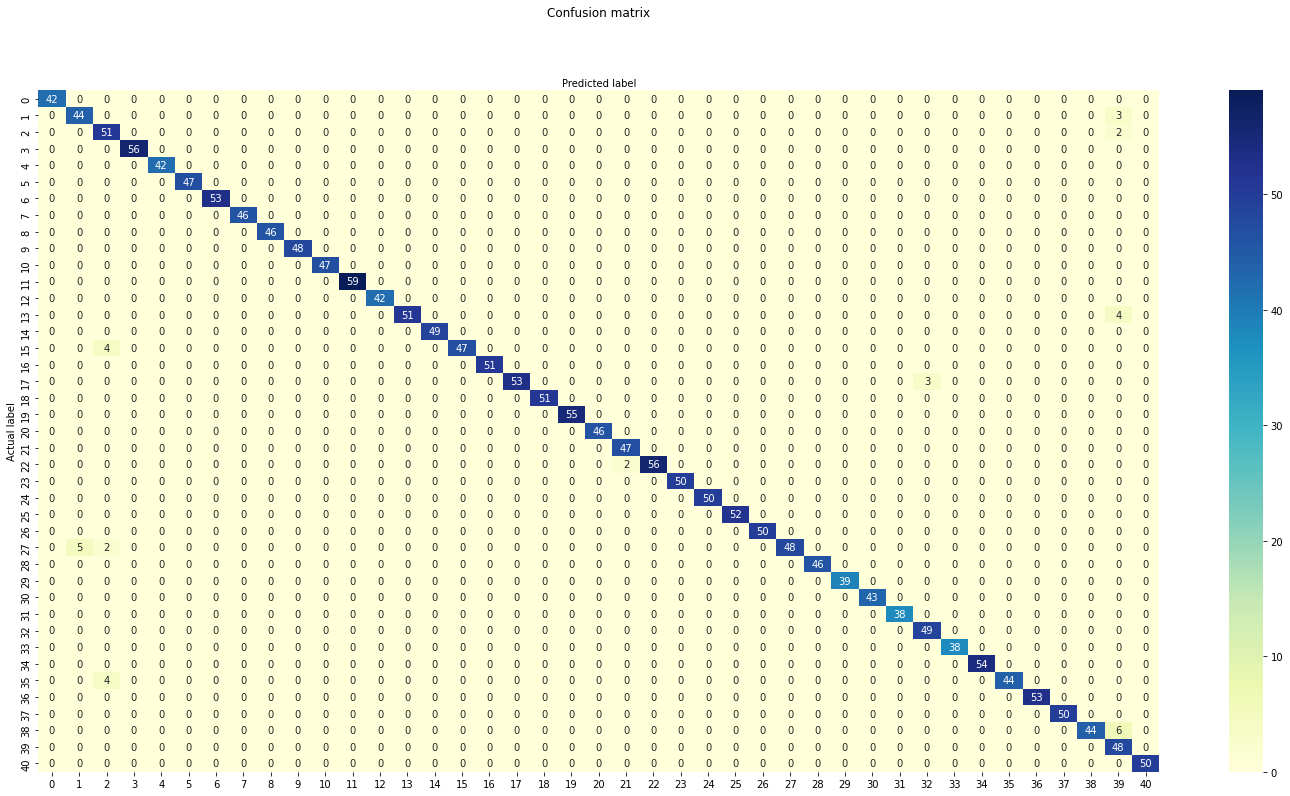

In [63]:
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], prediction)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Model Loss and Acuracy Curve

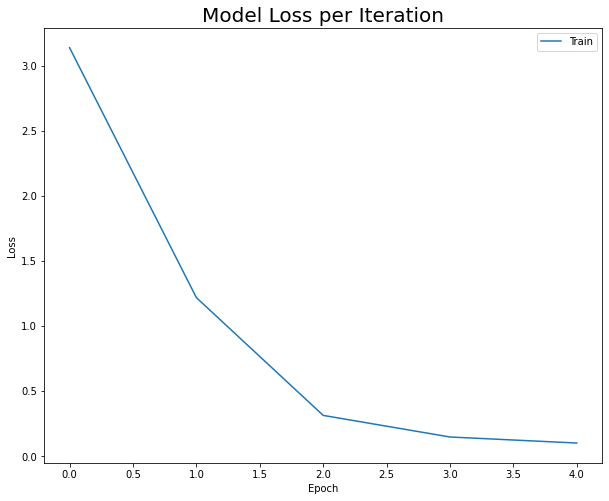

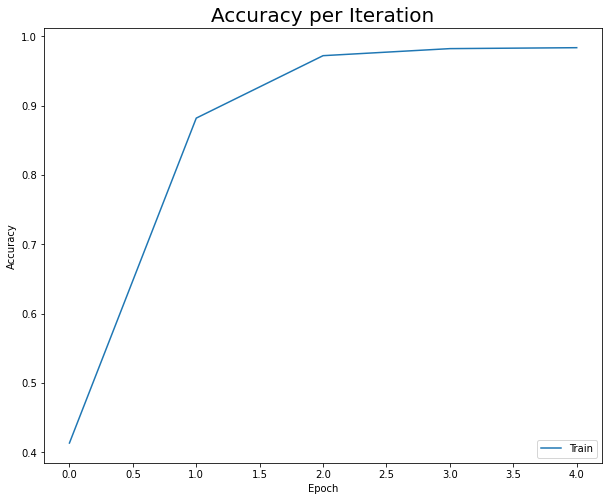

In [64]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.title('Model Loss per Iteration', fontsize=20)
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.title('Accuracy per Iteration', fontsize=20)
plt.show()

#### Classification report

In [65]:
print(classification_report( test_set['prognosis'], prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.90      0.94      0.92        47
           2       0.84      0.96      0.89        53
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      0.93      0.96        55
          14       1.00      1.00      1.00        49
          15       1.00      0.92      0.96        51
          16       1.00      1.00      1.00        51
          17       1.00    

In a medical test the big indicators of success are specificity and sensitivity.

> Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.

> Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative

> Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.

> F1 score - a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

## Model Accuracy Comparision

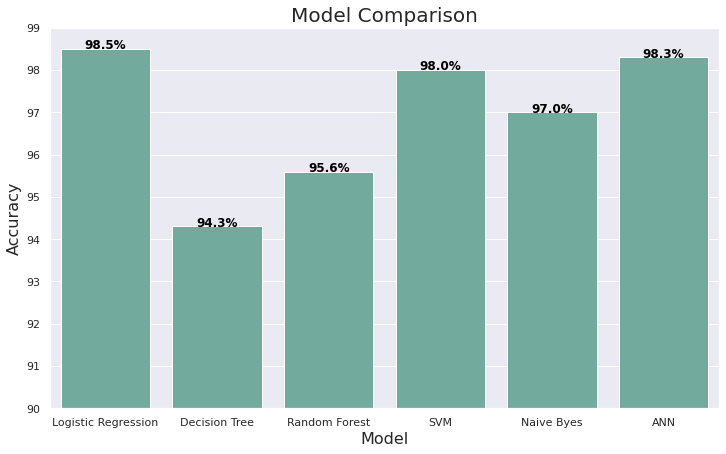

In [66]:
sns.set(style="darkgrid")

acc = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest','SVM','Naive Byes','ANN'],'Accuracy':[98.5,94.3,95.6,98,97,98.3]})

# Setting the figure size
fig, ax =  plt.subplots(figsize=(12, 7))
ax.set_ylim(90, 99)

# plotting a bar chart
sns.barplot(
    x="Model", 
    y="Accuracy", 
    data=acc,  
    ci=None, 
    color='#69b3a2',
    orient='v'
)

# addding title and axis labels
plt.title('Model Comparison', fontsize=20)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

# addding labels for each bar
for i, v in enumerate(acc['Accuracy']):
    ax.text(i, v, str(v)+'%', color='black', fontweight='bold', ha='center')

plt.show()